# IPL Data Analysis

## Extensive Analysis into IPL stats from 2008 to 2020. 

#### Indian Premier League is a cricket tournament primarily hosted in India, consisting of 8-10 teams per season competing for the trophy. This dataset looks into the proceedings of the match, down to every ball bowled. We are going to take a look at this dataset and present a thorough analysis over a varied course of topics. 

### Considering the data at our disposal, we will look through and analyse the following - 

* [Individual Match Scores and their rate of improvement](#improve)


* [Result Margin](#result_margin) - 
    1. [Role of Win Result](#result_margin_result)
    2. [Role of Particular City Hosting](#result_margin_city)
    3. [Role of Particular Venue Hosting](#result_margin_venue)
    4. [Role of Toss](#result_margin_toss)


* [Match Stats](#match) - 
    1. [Highest Runs](#match_runs)
    2. [Most Wickets](#match_wickets)
    3. [Greatest Dismissals](#match_dismiss)
    4. [Recurring Umpires](#match_ump)
    

* [Inning](#inning) - 
    1. [Total Score](#inning_tot_sc)
    2. [Extras Score](#inning_tot_ex)
    3. [Total Wickets](#inning_tot_wic)

        
* [Per Over](#over) - 
    1. [Mean Score](#over_sc)
    2. [Mean Extras](#over_ex)
    3. [Mean Wickets](#over_wic)


* [Batsman Stats](#batsman) - 
    1. [Total runs scored](#batsman_runs)
    2. [Runs scored in each innings](#batsman_runs_innings)
    3. [Times a batsman has been declared out (number of wickets)](#batsman_wickets)
    4. [Balls played in total](#batsman_balls)
    5. [Batsman Average](#batsman_avg)
    6. [Batsman Strike Rate](#batsman_strikerate)
    
    
* [Bowler Stats](#bowler) - 
    1. [Total balls bowled](#bowler_balls)
    2. [Total wickets taken](#bowler_wickets)
    3. [Runs given](#bowler_runs)
    4. [Extra runs given](#bowler_extras)
    5. [Economy Rate of bowler](#bowler_ecorate)
    
    
* [IPL Stats](#ipl) - 
    1. [Best Players](#ipl_player)
    2. [Toss Wins](#ipl_toss)
    3. [Best Team Performance](#ipl_team)
    

* [Drafting a team with the best players from our analysis](#self_team)

For the data, we will use pretty basic and rudimentary data analysis techniques which will help us perform all the tasks mentioned above. In this partiular case, we will divide the work into five categories - 
* [Importing / Invoking Libraries and Datasets](#import)
* [Data Cleaning](#clean)
* [Feature Engineering](#main)
* [Exploratory Data Analysis](#main)
* [Data Visualization](#main)


<a id="import"></a>
## Importing / Invoking Datasets and Libraries


### Importing Libraries

In [1]:
# data processing
import pandas as pd
import numpy as np
import functools
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("\n Libraries imported successfully")


 Libraries imported successfully


### Importing Datasets

In [2]:
# set and define filepath
ballbyball_filepath = "IPL Ball-by-Ball 2008-2020.csv"
matches_filepath = "IPL Matches 2008-2020.csv"

# create dataframe for analysis
ballplay = pd.read_csv(ballbyball_filepath)
matches = pd.read_csv(matches_filepath)

In [3]:
# display first 5 rows of matches dataframe
matches.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [4]:
# display first 5 rows of ballplay dataframe
ballplay.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


<a id="clean"></a>
## Data Cleaning

Our data cleaning process will involve the following - 
* A view of the description of the dataset
* Checking for any null values
* If need be, replacing null values with the mean of the column values
* A look through individual columns of the datasets
* Change or replace values across any necessary columns

### Dataset Description

In [5]:
# give an overview / description of the dataset
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
# give an overview / description of the dataset 
ballplay.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


### Check for Null Values

In [7]:
# check for null values
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
# check for null values
ballplay.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

### Converting null Values

We will be sticking to using the mean of every column present in the dataset to fill in the null values across the dataset.

In [9]:
# convert null values based on desired column
matches = matches.fillna(matches.mean())
matches.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


### Column Exploration & Manipulation

A look through certain columns and replacing certain repetitive values

In [10]:
#city = matches.city.unique()
#city

#venue = matches.venue.unique()
#venue

#team_1 = matches.team1.unique()
#team_1

#team_2 = matches.team2.unique()
#team_2

# replace repetitive values
matches = matches.replace({"city": {"Bangalore" : "Bengaluru"}, 
                           "team1": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "team2": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "toss_winner": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "winner": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"}})

matches = matches.round(2)

matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


<a id="main"></a>
## Feature Engineering, Data Analysis and Visualization

<a id="improve"></a>
### Individual Match Scores and Their Rate of Improvement

<a id="result_margin"></a>
### Result Margin

<a id="result_margin_result"></a>
#### 1. Role of Win Result

A chart representing the division of wins amongst IPL matches

In [11]:
result_margin = matches[["result", "result_margin"]].groupby(["result"], as_index=False).mean()

In [12]:
#plotting Graph

fig = px.pie(result_margin, values='result_margin', names='result', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<a id="result_margin_city"></a>
#### 2. Role of Particular City Hosting

A chart depicting the wins in IPL across hosting cities

In [13]:
city_result = matches[["city", "result_margin"]].groupby(["city"], as_index=False).mean()

In [14]:
#plotting Graph

fig = px.bar(city_result, x="city", y="result_margin", color="result_margin", template="simple_white", title="Role of Hosting City in IPL Wins")
fig.show()

<a id="result_margin_venue"></a>
#### 3. Role of Particular Venue Hosting

A chart depicting the wins in IPL across hosting venues

In [15]:
venue_result = matches[["venue", "result_margin"]].groupby(["venue"], as_index=False).mean()

In [16]:
#plotting Graph

fig = px.bar(venue_result, x="venue", y="result_margin", color="result_margin", template="simple_white", title="Role of Hosting Venue in IPL Wins")
fig.show()

<a id="result_margin_toss"></a>
#### 4. Role of Toss

A chart representing the divisions of toss in IPL

In [17]:
toss_margin = matches[["toss_decision", "result_margin"]].groupby(["toss_decision"], as_index=False).mean()

In [18]:
#plotting Graph

fig = px.pie(toss_margin, values='result_margin', names='toss_decision', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

<a id="match"></a>
### Match Stats

<a id="match_runs"></a>
#### 1. Highest Runs

A representation of runs scored across a chart

In [19]:
runs_max = ballplay[["id", "inning", "total_runs"]].groupby(["id", "inning"], as_index=False).sum()
runs_max = runs_max.sort_values(by="total_runs", ascending=False)

In [20]:
#plotting Graph

fig = px.histogram(runs_max, x='total_runs', marginal="rug", color_discrete_sequence=['indianred'], template="simple_white", title="Runs Scored Representation")
fig.show()

<a id="match_wickets"></a>
#### 2. Most Wickets

A representation of wickets taken across a chart

In [21]:
wickets_max = ballplay[["id", "inning", "is_wicket"]].groupby(["id", "inning"], as_index=False).sum()
wickets_max = wickets_max.sort_values(by="is_wicket", ascending=False)

In [22]:
#plotting Graph

fig = px.histogram(wickets_max, x='is_wicket', color_discrete_sequence=['darkgreen'], template="simple_white", title="Wickets Taken Representation")
fig.show()

<a id="match_dismiss"></a>
#### 3. Greatest Dismissals

A representation of the types of dismissals across a chart

In [23]:
dismissal_max = ballplay[["is_wicket", "dismissal_kind"]].groupby(["dismissal_kind"], as_index=False).sum()
dismissal_max = dismissal_max.sort_values(by="dismissal_kind", ascending=False)

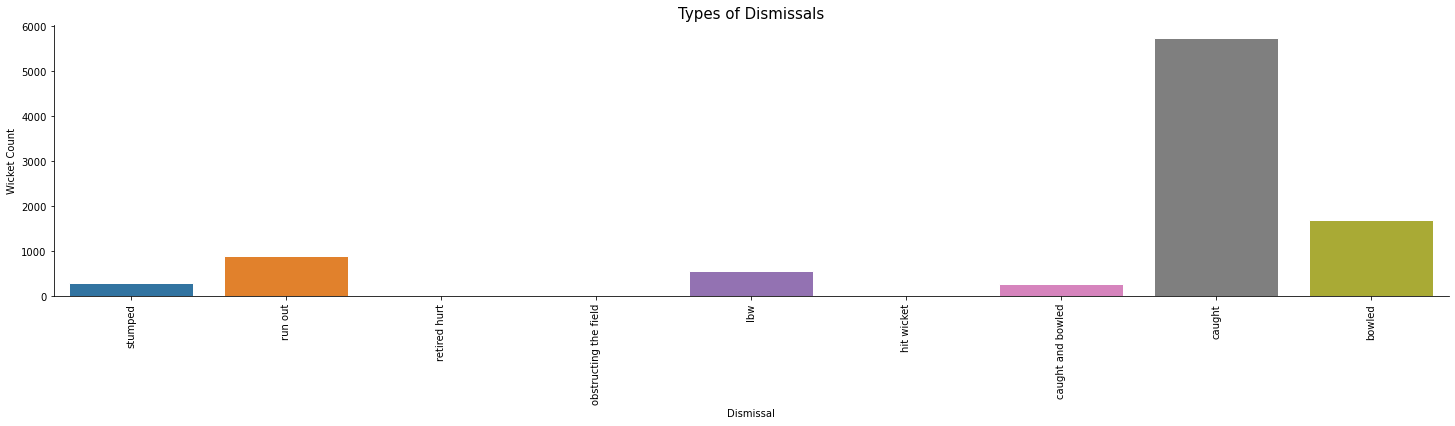

In [24]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_total_runs = sns.barplot(x='dismissal_kind', y='is_wicket', data=dismissal_max, ax=ax)
ax.set_title("Types of Dismissals", fontsize=15)
ax.set_ylabel("Wicket Count")
ax.set_xlabel("Dismissal")
ax.set_xticklabels(dismissal_max["dismissal_kind"], rotation=90)
plt.show()

<a id="match_ump"></a>
#### 4. Recurring Umpires

A chart representing frequency of Umpire 1 and Umpire 2 appearance

In [25]:
umpire1 = matches["umpire1"].unique() 
umpire2 = matches["umpire2"].unique()
umpire1_occurence = []
umpire2_occurence = []

for i in umpire1:
    umpire1_occurence.append(matches.loc[(matches["umpire1"] == i), "id"].count())
for i in umpire2:
    umpire2_occurence.append(matches.loc[(matches["umpire2"] == i), "id"].count())
    
umpire1_max = pd.DataFrame(list(zip(umpire1, umpire1_occurence)), columns=["umpire1", "occurence"])
umpire2_max = pd.DataFrame(list(zip(umpire2, umpire2_occurence)), columns=["umpire2", "occurence"])

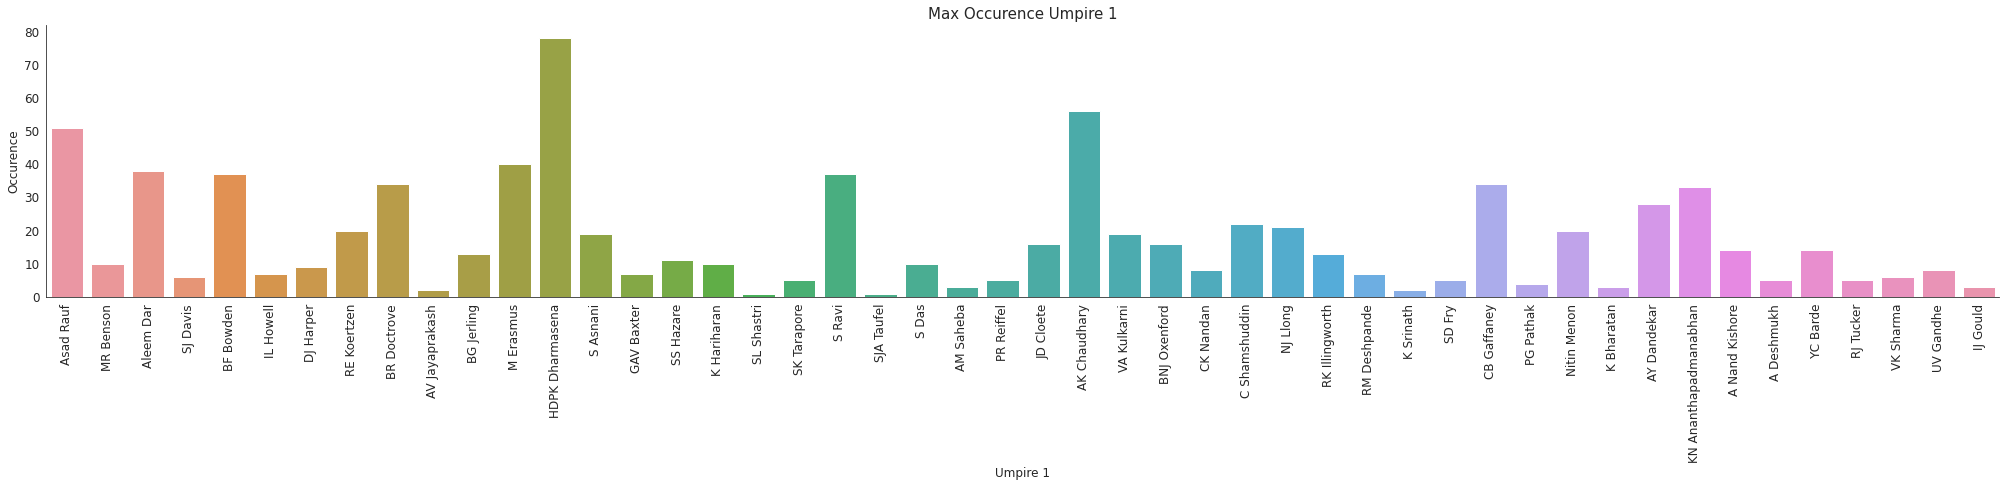

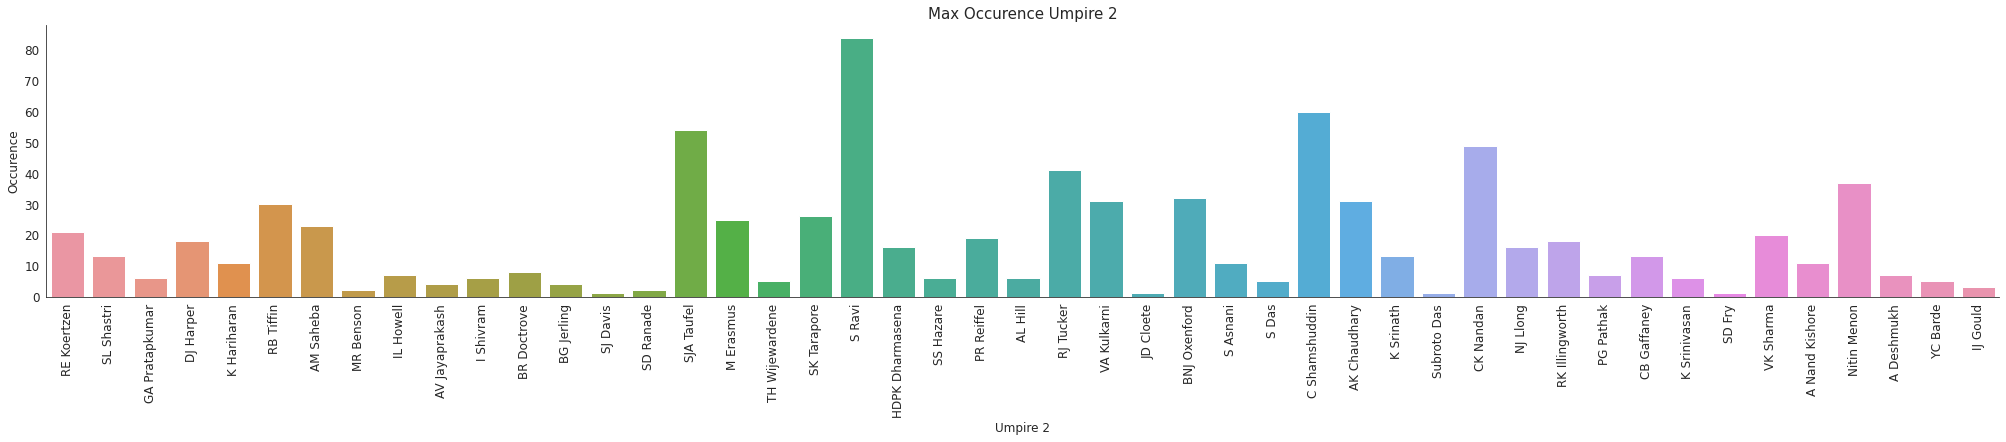

In [26]:
#plotting Graph
fig, ax = plt.subplots(figsize=(35,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_total_runs = sns.barplot(x='umpire1', y='occurence', data=umpire1_max.reset_index(), ax=ax)
ax.set_title("Max Occurence Umpire 1", fontsize=15)
ax.set_ylabel("Occurence")
ax.set_xlabel("Umpire 1")
ax.set_xticklabels(umpire1_max["umpire1"], rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(35,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_total_runs = sns.barplot(x='umpire2', y='occurence', data=umpire2_max.reset_index(), ax=ax)
ax.set_title("Max Occurence Umpire 2", fontsize=15)
ax.set_ylabel("Occurence")
ax.set_xlabel("Umpire 2")
ax.set_xticklabels(umpire2_max["umpire2"], rotation=90)
plt.show()

<a id="inning"></a>
### Innings

In [27]:
total_inning_scores = ballplay[["id", "inning", "total_runs"]].groupby(['id', 'inning'], as_index=False).sum()
total_inning_extras = ballplay[["id", "inning", "extra_runs"]].groupby(['id', 'inning'], as_index=False).sum()
total_inning_wickets = ballplay[["id", "inning", "is_wicket"]].groupby(['id', 'inning'], as_index=False).sum()

<a id="inning_tot_sc"></a>
#### 1. Total Score

A distribution of total runs scored across matches

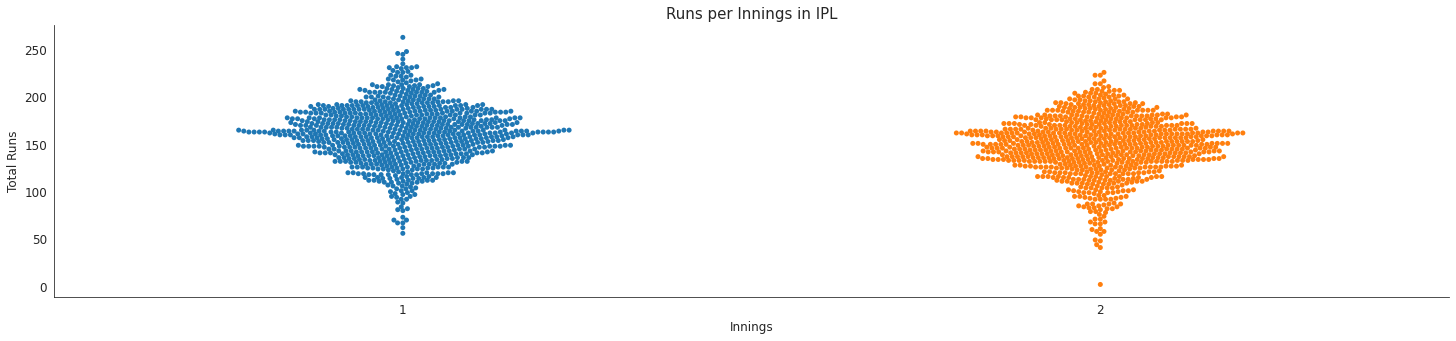

In [28]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_total_runs = sns.swarmplot(x='inning', y='total_runs', data=total_inning_scores.reset_index(), ax=ax)
ax.set_title("Runs per Innings in IPL", fontsize=15)
ax.set_ylabel("Total Runs")
ax.set_xlabel("Innings")
ax.set_xticklabels(total_inning_scores['inning'], rotation=0)
plt.show()

<a id="inning_tot_ex"></a>
#### 2. Total Extras Score

A distribution of extra runs given across matches

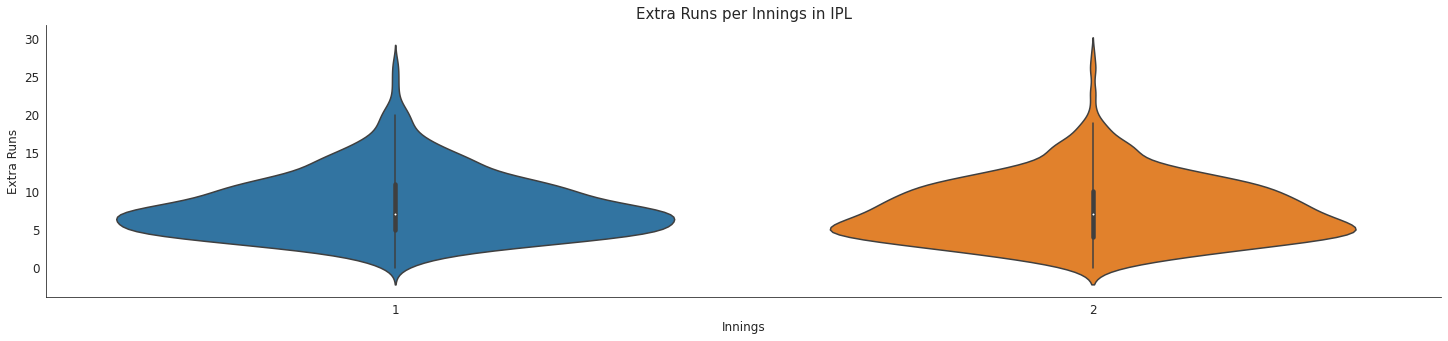

In [29]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_extra_runs = sns.violinplot(x='inning', y='extra_runs', data=total_inning_extras.reset_index(), ax=ax)
ax.set_title("Extra Runs per Innings in IPL", fontsize=15)
ax.set_ylabel("Extra Runs")
ax.set_xlabel("Innings")
ax.set_xticklabels(total_inning_extras['inning'], rotation=0)
plt.show()

<a id="inning_tot_wic"></a>
#### 3. Total Wickets

A distribution of wickets taken across matches

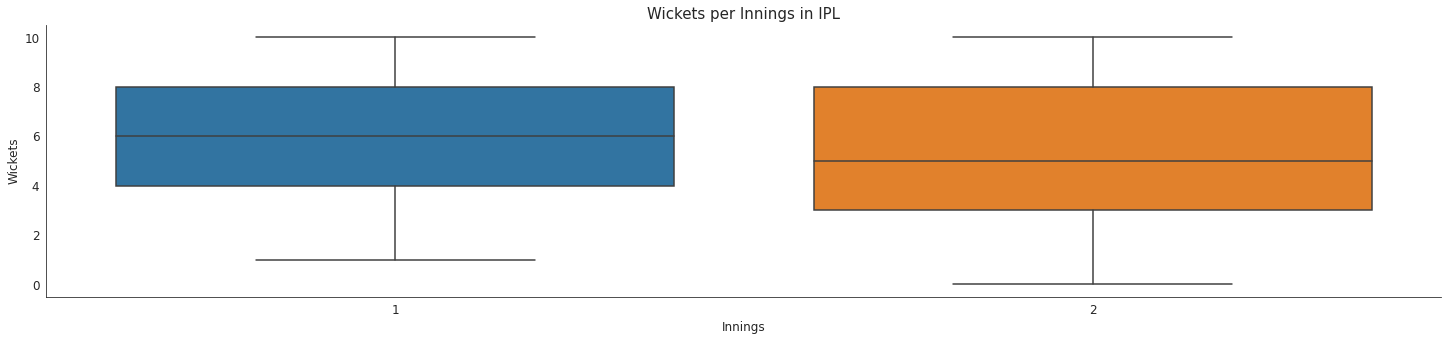

In [30]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

sns.despine()
sns.set_style("white")
sns_wickets = sns.boxplot(x='inning', y='is_wicket', data=total_inning_wickets.reset_index(), ax=ax)
ax.set_title("Wickets per Innings in IPL", fontsize=15)
ax.set_ylabel("Wickets")
ax.set_xlabel("Innings")
ax.set_xticklabels(total_inning_wickets['inning'], rotation=0)
plt.show()

<a id="over"></a>
### Per Over

In [31]:
score_by_over = ballplay[["over", "total_runs"]].groupby(['over'], as_index=False).sum()
extras_by_over = ballplay[["over", "extra_runs"]].groupby(['over'], as_index=False).sum()
wickets_by_over = ballplay[["over", "is_wicket"]].groupby(['over'], as_index=False).sum()

<a id="over_sc"></a>
#### 1. Mean Score

Depiction of mean runs scored per over

In [32]:
#plotting Graph

fig = px.line(score_by_over, x="over", y="total_runs", template="simple_white")
fig.show()

<a id="over_ex"></a>
#### 2. Mean Extras Score

Depiction of mean extras given per over

In [33]:
#plotting Graph

fig = px.line(extras_by_over, x="over", y="extra_runs", template="simple_white")
fig.show()

<a id="over_wic"></a>
#### 3. Mean Wicket Count

Depiction of wickets taken per over

In [34]:
#plotting Graph

fig = px.line(wickets_by_over, x="over", y="is_wicket", template="simple_white")
fig.show()

<a id="batsman"></a>
### Batsman Stats

In [35]:
batsman = ballplay["batsman"].unique()

runs = []
inning1_score = []
inning2_score = []
wicket = []
balls_play = []


for i in batsman:
    runs.append(ballplay.loc[(ballplay["batsman"] == i), "batsman_runs"].sum())
    inning1_score.append(ballplay.loc[((ballplay["batsman"] == i) & (ballplay["inning"] == 1)), "batsman_runs"].sum())
    inning2_score.append(ballplay.loc[((ballplay["batsman"] == i) & (ballplay["inning"] == 2)), "batsman_runs"].sum())
    wicket.append(ballplay.loc[(ballplay["batsman"] == i), "is_wicket"].sum())
    balls_play.append(ballplay.loc[(ballplay["batsman"] == i), "batsman_runs"].count())

average = [(int(x) / int(y)) if ((y > 0) & (x > 0)) else 0 for x,y in zip(runs, wicket)]
strike_rate = [((int(x) / int(y)) * 100) if ((y > 0) & (x > 0)) else 0 for x,y in zip(runs, balls_play)]

batsmen_stats = pd.DataFrame(list(zip(batsman, runs, inning1_score, inning2_score, balls_play, wicket, average, strike_rate)), columns=["batsman", "runs", "innings1 score", "innings2 score", "balls played", "wickets", "average", "strike rate"])

<a id="batsman_runs"></a>
#### 1. Total Runs Scored

A distribution of total runs scored per batsman

In [36]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="runs", template="simple_white", title="Total Runs Scored")
fig.update_xaxes(showticklabels=False)
fig.show()

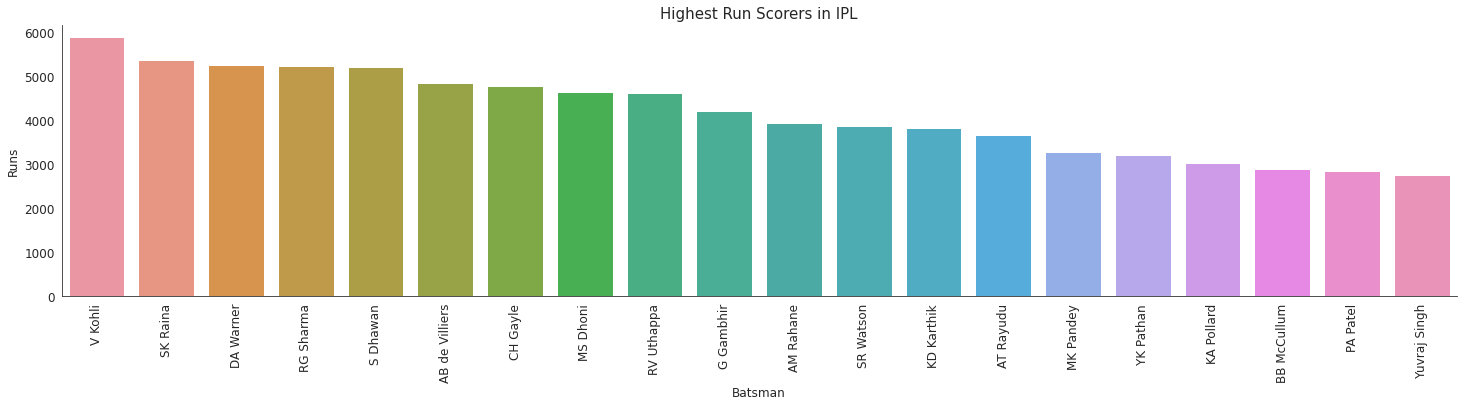

In [37]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_runs = batsmen_stats.sort_values(by="runs", ascending=False).iloc[0:20, [0, 1]]

sns.despine()
sns.set_style("white")
sns_mostruns = sns.barplot(x='batsman', y='runs', data=most_runs.reset_index(), ax=ax)
ax.set_title("Highest Run Scorers in IPL", fontsize=15)
ax.set_ylabel("Runs")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_runs["batsman"], rotation=90)
plt.show()

<a id="batsman_runs_innings"></a>
#### 2. Runs Scored in Each Inning

Innings 1 Score

In [38]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="innings1 score", template="simple_white", title="Inning 1 Scores")
fig.update_xaxes(showticklabels=False)
fig.show()

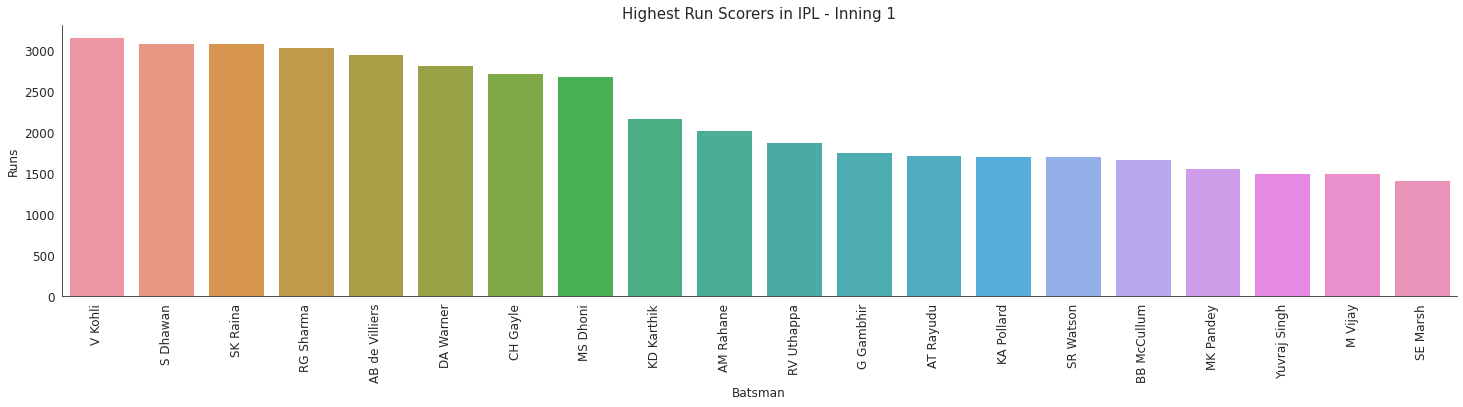

In [39]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_runs_inning1 = batsmen_stats.sort_values(by="innings1 score", ascending=False).iloc[0:20, [0, 2]]

sns.despine()
sns.set_style("white")
sns_mostrunsinning1 = sns.barplot(x='batsman', y='innings1 score', data=most_runs_inning1.reset_index(), ax=ax)
ax.set_title("Highest Run Scorers in IPL - Inning 1", fontsize=15)
ax.set_ylabel("Runs")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_runs_inning1["batsman"], rotation=90)
plt.show()

Inning 2 Score

In [40]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="innings2 score", template="simple_white", title="Inning 2 Scores")
fig.update_xaxes(showticklabels=False)
fig.show()

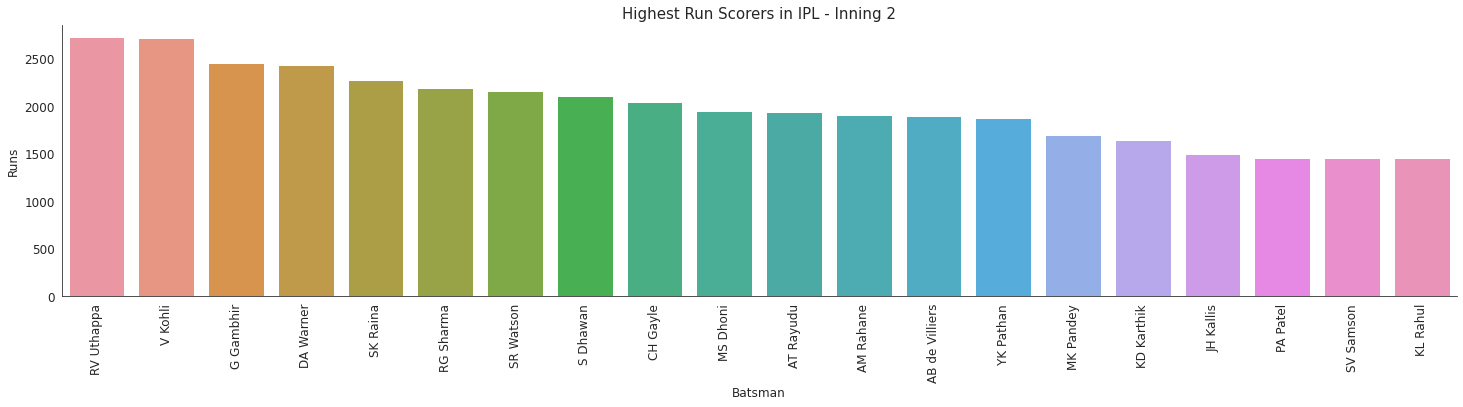

In [41]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_runs_inning2 = batsmen_stats.sort_values(by="innings2 score", ascending=False).iloc[0:20, [0, 3]]

sns.despine()
sns.set_style("white")
sns_mostrunsinning2 = sns.barplot(x='batsman', y='innings2 score', data=most_runs_inning2.reset_index(), ax=ax)
ax.set_title("Highest Run Scorers in IPL - Inning 2", fontsize=15)
ax.set_ylabel("Runs")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_runs_inning2["batsman"], rotation=90)
plt.show()

<a id="batsman_wickets"></a>
#### 3. Times a Batsman Has Been Declared Out (Number of Wickets)

A distribution of wickets taken per batsman

In [42]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="wickets", template="simple_white", title="Wicket Distribution")
fig.update_xaxes(showticklabels=False)
fig.show()

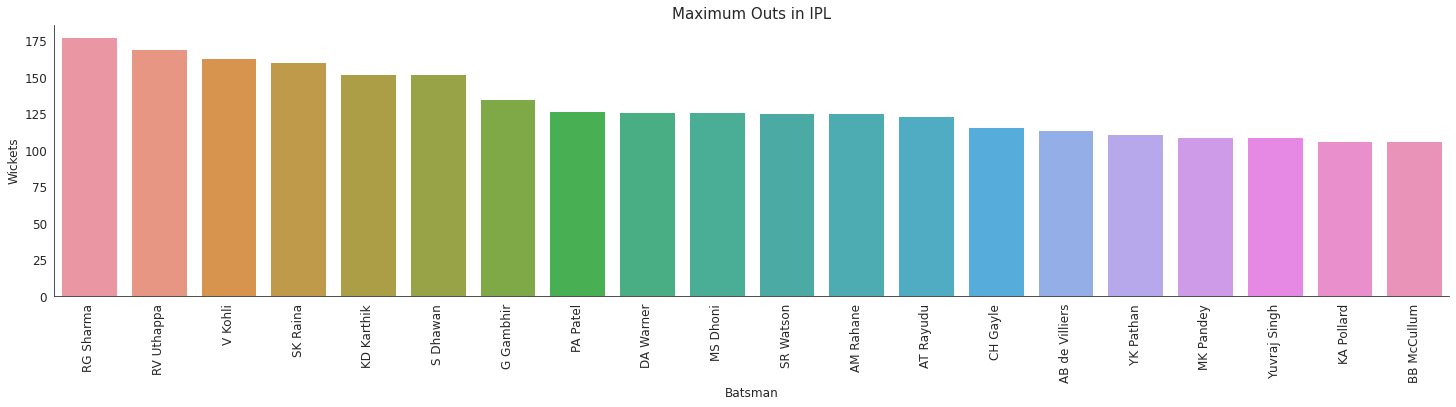

In [43]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_wickets = batsmen_stats.sort_values(by="wickets", ascending=False).iloc[0:20, [0, 5]]

sns.despine()
sns.set_style("white")
sns_mostwickets = sns.barplot(x='batsman', y='wickets', data=most_wickets.reset_index(), ax=ax)
ax.set_title("Maximum Outs in IPL", fontsize=15)
ax.set_ylabel("Wickets")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_wickets["batsman"], rotation=90)
plt.show()

<a id="batsman_balls"></a>
#### 4. Balls Played in Total

A distribution of balls played per batsman

In [44]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="balls played", template="simple_white", title="Balls Played")
fig.update_xaxes(showticklabels=False)
fig.show()

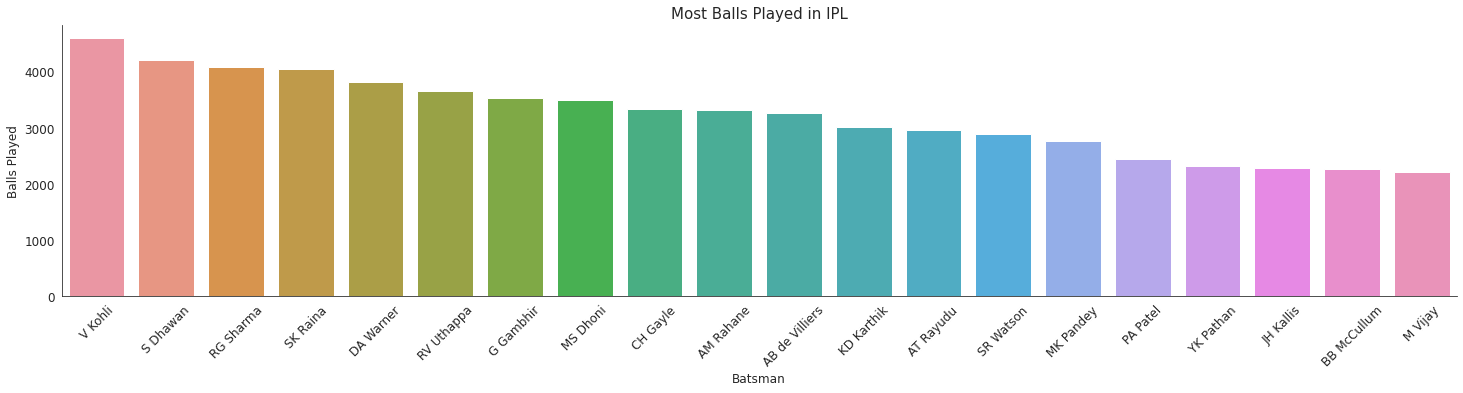

In [45]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_balls = batsmen_stats.sort_values(by="balls played", ascending=False).iloc[0:20, [0, 4]]

sns.despine()
sns.set_style("white")
sns_mostballs = sns.barplot(x='batsman', y='balls played', data=most_balls.reset_index(), ax=ax)
ax.set_title("Most Balls Played in IPL", fontsize=15)
ax.set_ylabel("Balls Played")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_balls["batsman"], rotation=45)
plt.show()

<a id="batsman_avg"></a>
#### 5. Batsman Average

A distribution of averages per batsman

In [46]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="average", template="simple_white", title="Batsman Averages")
fig.update_xaxes(showticklabels=False)
fig.show()

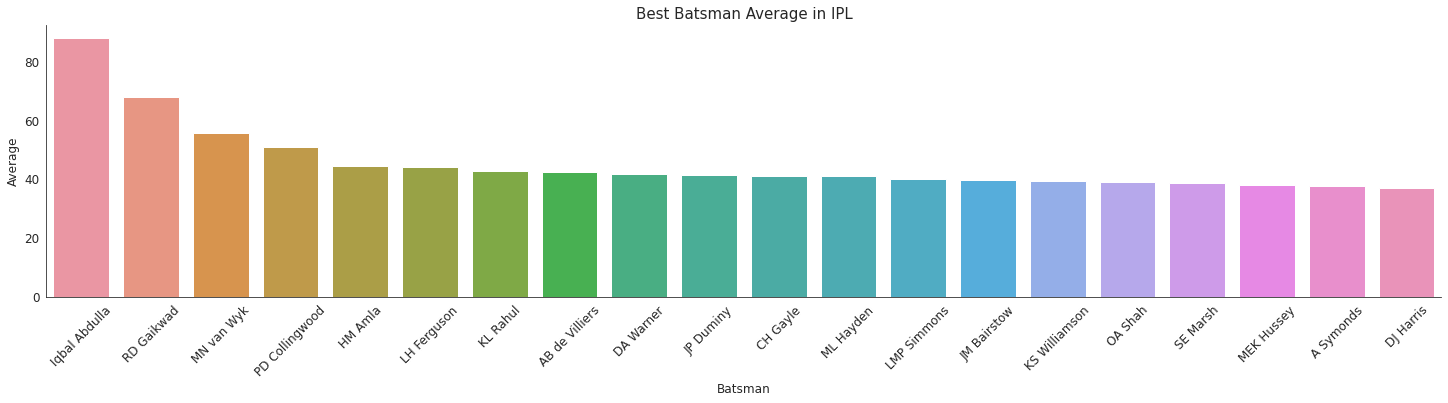

In [47]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_avg = batsmen_stats.sort_values(by="average", ascending=False).iloc[0:20, [0, 6]]

sns.despine()
sns.set_style("white")
sns_bestavg = sns.barplot(x='batsman', y='average', data=most_avg.reset_index(), ax=ax)
ax.set_title("Best Batsman Average in IPL", fontsize=15)
ax.set_ylabel("Average")
ax.set_xlabel("Batsman")
ax.set_xticklabels(most_avg["batsman"], rotation=45)
plt.show()

<a id="batsman_strikerate"></a>
#### 6. Batsman Strike Rate

A distribution of strike rates per batsman

In [48]:
#plotting Graph

fig = px.scatter(batsmen_stats, x="batsman", y="strike rate", template="simple_white", title="Batsman Averages in IPL")
fig.update_xaxes(showticklabels=False)
fig.show()

Here is the dataset for all calculations regarding Batsman Stats - 

In [49]:
batsmen_stats = batsmen_stats.round(2)
batsmen_stats.head(10)

,batsman,runs,innings1 score,innings2 score,balls played,wickets,average,strike rate
0,RT Ponting,91,59,32,129,8,11.38,70.54
1,BB McCullum,2880,1681,1199,2267,106,27.17,127.04
2,DJ Hussey,1322,739,583,1101,49,26.98,120.07
3,Mohammad Hafeez,64,38,26,84,8,8.00,76.19
4,SC Ganguly,1349,721,628,1326,54,24.98,101.73
5,CL White,954,666,288,769,35,27.26,124.06
6,MV Boucher,394,150,244,318,15,26.27,123.90
7,B Akhil,76,31,45,57,7,10.86,133.33
8,AA Noffke,9,0,9,12,1,9.00,75.00
9,P Kumar,340,188,152,323,34,10.00,105.26


<a id="bowler"></a>
### Bowler Stats

In [50]:
bowler = ballplay["bowler"].unique()
max_extras = []
extra_runs = []
runs_given = []
wickets = []
balls_bowled = []

for i in bowler:
    balls_bowled.append(ballplay.loc[(ballplay["bowler"] == i), "batsman_runs"].count())
    wickets.append(ballplay.loc[(ballplay["bowler"] == i), "is_wicket"].sum())
    runs_given.append(ballplay.loc[(ballplay["bowler"] == i), "total_runs"].sum())
    extra_runs.append(ballplay.loc[(ballplay["bowler"] == i), "extra_runs"].sum())
    
economy_rate = [((int(x) / (int(y))) * 6) if ((y > 0) & (x > 0)) else 0 for x,y in zip(runs_given, balls_bowled)]

bowler_stats = pd.DataFrame(list(zip(bowler, wickets, balls_bowled, runs_given, extra_runs, economy_rate)), columns=["bowler", "wickets", "balls_bowled", "runs", "extras (runs)", "economy_rate"])

<a id="bowler_balls"></a>
#### 1. Balls Bowled

A distribution of balls bowled per bowler

In [51]:
#plotting Graph

fig = px.scatter(bowler_stats, x="bowler", y="balls_bowled", template="simple_white", title="Balls Bowled in IPL")
fig.update_xaxes(showticklabels=False)
fig.show()

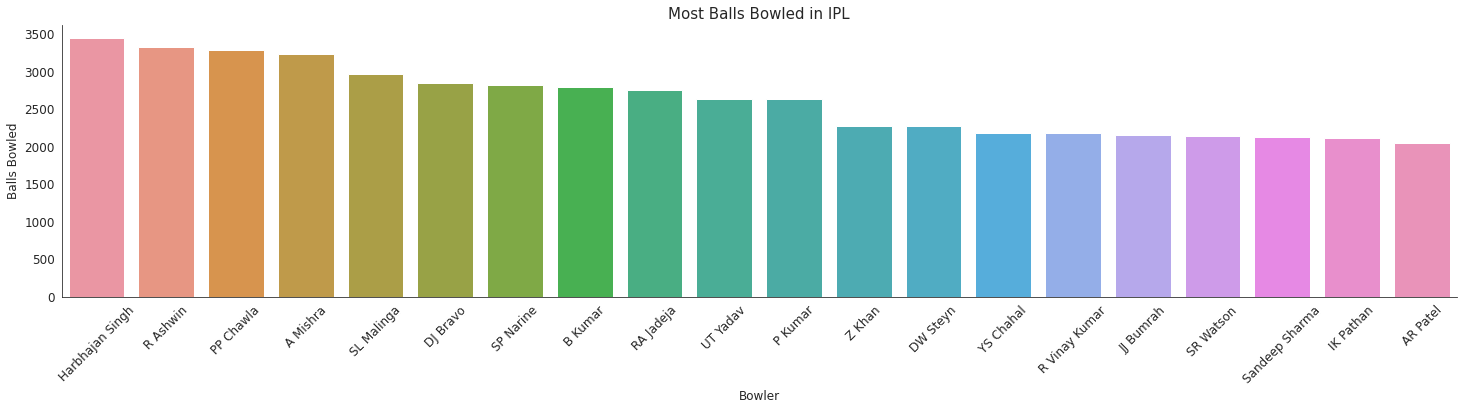

In [52]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_balls = bowler_stats.sort_values(by="balls_bowled", ascending=False).iloc[0:20, [0, 2]]

sns.despine()
sns.set_style("white")
sns_mostballs = sns.barplot(x='bowler', y='balls_bowled', data=most_balls.reset_index(), ax=ax)
ax.set_title("Most Balls Bowled in IPL", fontsize=15)
ax.set_ylabel("Balls Bowled")
ax.set_xlabel("Bowler")
ax.set_xticklabels(most_balls["bowler"], rotation=45)
plt.show()

<a id="bowler_wickets"></a>
#### 2. Total Wickets Taken

A distribution of wickets taken per bowler

In [53]:
#plotting Graph

fig = px.scatter(bowler_stats, x="bowler", y="wickets", template="simple_white", title="Wickets Taken in IPL")
fig.update_xaxes(showticklabels=False)
fig.show()

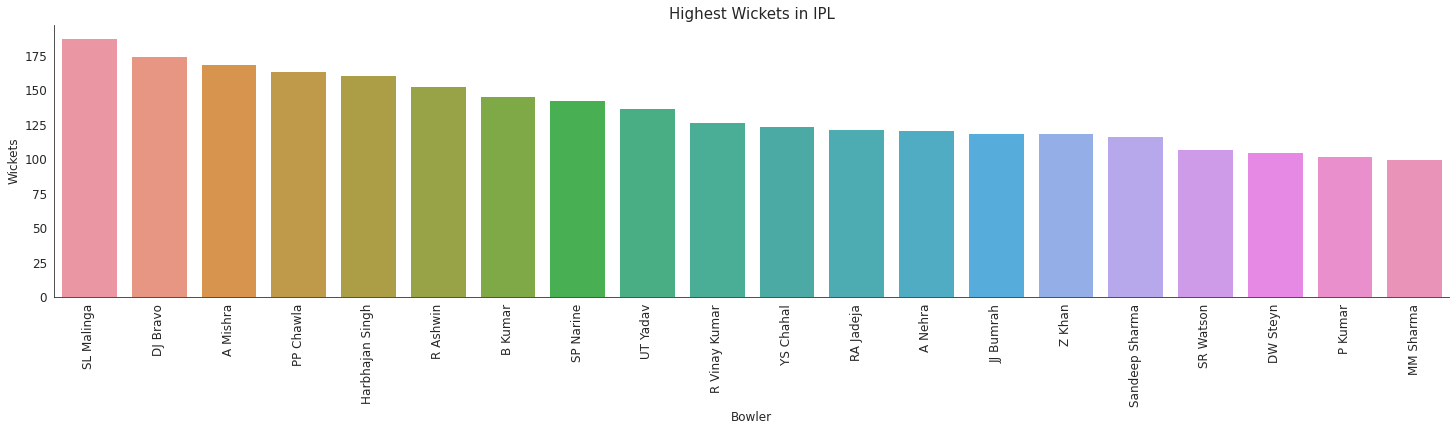

In [54]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_wickets = bowler_stats.sort_values(by="wickets", ascending=False).iloc[0:20, [0, 1]]

sns.despine()
sns.set_style("white")
sns_mostwickets = sns.barplot(x='bowler', y='wickets', data=most_wickets.reset_index(), ax=ax)
ax.set_title("Highest Wickets in IPL", fontsize=15)
ax.set_ylabel("Wickets")
ax.set_xlabel("Bowler")
ax.set_xticklabels(most_wickets["bowler"], rotation=90)
plt.show()

<a id="bowler_runs"></a>
#### 3. Runs Given

A distribution of total runs given per bowler

In [55]:
#plotting Graph

fig = px.scatter(bowler_stats, x="bowler", y="runs", template="simple_white", title="Total Runs Given")
fig.update_xaxes(showticklabels=False)
fig.show()

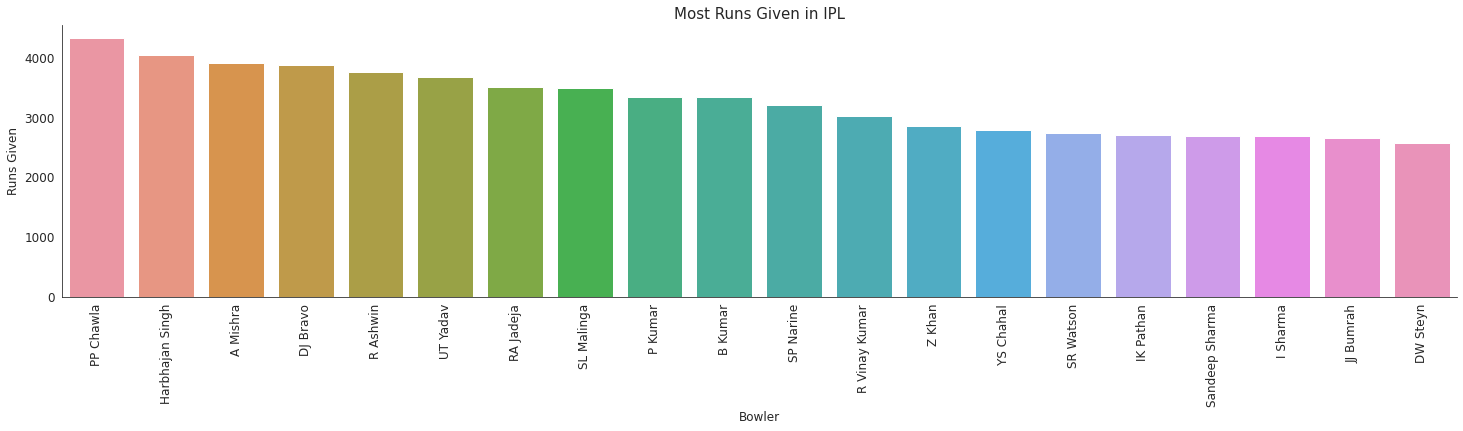

In [56]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_runs_given = bowler_stats.sort_values(by="runs", ascending=False).iloc[0:20, [0, 3]]

sns.despine()
sns.set_style("white")
sns_runsgiven = sns.barplot(x='bowler', y='runs', data=most_runs_given.reset_index(), ax=ax)
ax.set_title("Most Runs Given in IPL", fontsize=15)
ax.set_ylabel("Runs Given")
ax.set_xlabel("Bowler")
ax.set_xticklabels(most_runs_given["bowler"], rotation=90)
plt.show()

<a id="bowler_extras"></a>
#### 4. Extra Runs Given

A distribution of extra runs given per bowler

In [57]:
#plotting Graph

fig = px.scatter(bowler_stats, x="bowler", y="extras (runs)", template="simple_white", title="Extra Runs Given")
fig.update_xaxes(showticklabels=False)
fig.show()

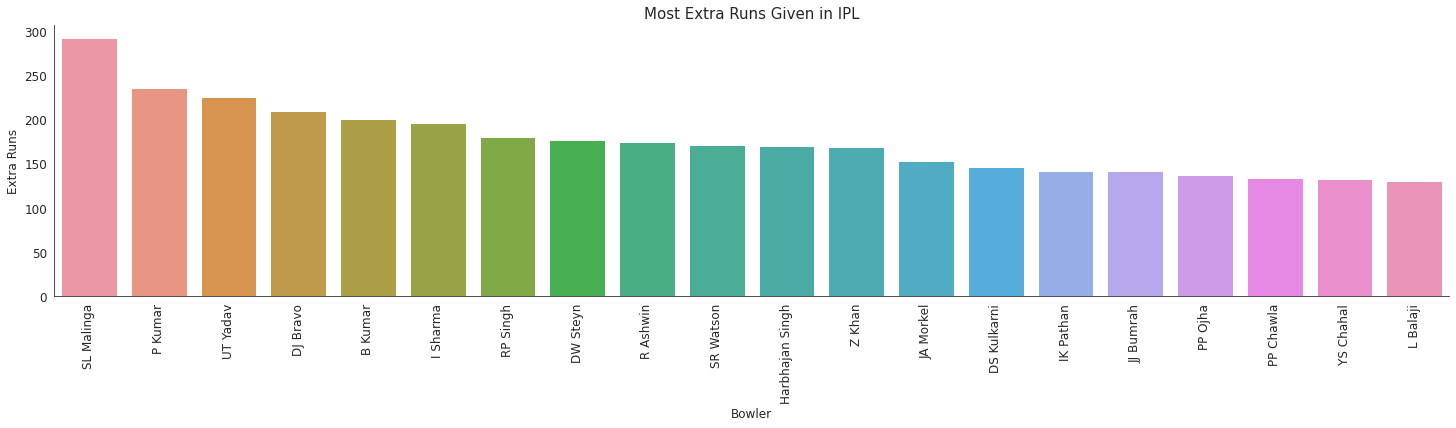

In [58]:
#plotting Graph
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12

most_extras = bowler_stats.sort_values(by="extras (runs)", ascending=False).iloc[0:20, [0, 4]]

sns.despine()
sns.set_style("white")
sns_mostextras = sns.barplot(x='bowler', y='extras (runs)', data=most_extras.reset_index(), ax=ax)
ax.set_title("Most Extra Runs Given in IPL", fontsize=15)
ax.set_ylabel("Extra Runs")
ax.set_xlabel("Bowler")
ax.set_xticklabels(most_extras["bowler"], rotation=90)
plt.show()

<a id="bowler_ecorate"></a>
#### 5. Economy Rate of Bowler

A distribution of economy rates per bowler

In [59]:
#plotting Graph

fig = px.scatter(bowler_stats, x="bowler", y="economy_rate", template="simple_white", title="Economy Rate")
fig.update_xaxes(showticklabels=False)
fig.show()

Here is the dataset we used for computations regarding Bo

In [60]:
bowler_stats = bowler_stats.round(2)
bowler_stats.head(10)

,bowler,wickets,balls_bowled,runs,extras (runs),economy_rate
0,AA Noffke,1,25,41,6,9.84
1,Z Khan,119,2276,2860,169,7.54
2,JH Kallis,74,1799,2348,126,7.83
3,SB Joshi,1,55,82,0,8.95
4,CL White,1,46,86,5,11.22
5,P Kumar,102,2637,3342,236,7.60
6,AB Agarkar,33,820,1174,62,8.59
7,SC Ganguly,12,280,370,11,7.93
8,LR Shukla,17,326,458,29,8.43
9,I Sharma,73,2018,2681,196,7.97


<a id="ipl"></a>
### IPL Stats

<a id="ipl_batsman"></a>
#### 1. Best Players

Best Players based on IPL Player of The Match Counts

In [61]:
best_players = matches[["id", "player_of_match"]].groupby(["player_of_match"], as_index=False).count()

In [62]:
#plotting Graph

fig = px.scatter(best_players, x="player_of_match", y="id", color="id", template="simple_white", title="Best Batsman in IPL")
fig.update_xaxes(showticklabels=False)
fig.show()

<a id="ipl_toss"></a>
#### 2. Toss Wins

Toss Win Distribution based on IPL Match Wins

In [63]:
toss_wins = matches[["id", "toss_decision", "result"]].groupby(["toss_decision", "result"], as_index=False).count()

In [64]:
# plotting Graph

fig =px.bar(toss_wins, x='toss_decision', y='id', color='result', template="simple_white", title="Toss Decisions and Match Wins in IPL")
fig.show()

<a id="ipl_team"></a>
#### 3. Best Team Performance

A chart depicting the team wins across IPL

In [65]:
team_winner = matches[["id", "winner", "result"]].groupby(["winner", "result"], as_index=False).count()

In [66]:
#plotting Graph

fig = px.bar(team_winner, x="winner", y="id", color='result', barmode='group', template="simple_white", title="Team Wins in IPL")
fig.show()

<a id="self_team"></a>
### Drafting A Team With The Best Players From Analysis

### The best players across IPL are marked across 3 categories. 


* Batsman
* Bowler
* All Rounder


#### We will distribute the players across the categories in the following ways - 


* Divide the following categories into 3 valuations - Best, Average, Subpar

    1. Batsman Runs Scored
    2. Batsman Average
    3. Batsman Strike Rate
    4. Bowler Wickets Taken
    5. Bowler Economy Rate


* The Best Batsmen will have the highest runs scored in the lowest balls played
* The Best Bowler will have the highest wickets taken in the lowest balls bowled
* The All Rounders will have an average score across the batsman and bowler stats


### After Distribution, we can select players based on our desire to build the perfect team.

In [67]:
runs_lims = pd.cut(batsmen_stats["runs"], 3)
strikerate_lims = pd.cut(batsmen_stats["strike rate"], 3)
avg_lims = pd.cut(batsmen_stats["average"], 3)

Our categories for each statistic per batsman produce the following limits - 


* Runs - 
    1. 0 to 1959
    2. 1960 to 3918
    3. 3919 to 5878


* Strike Rate - 
    1. 0 to 83
    2. 84 to 166
    3. 167 to 250


* Average - 
    1. 0 to 29
    2. 30 to 58
    3. 59 to 88

In [68]:
batsmen_stats["runs"].fillna(batsmen_stats["runs"].dropna().median(), inplace=True)
batsmen_stats.loc[(batsmen_stats["runs"] <= 1959), "runs"] = 1
batsmen_stats.loc[(batsmen_stats["runs"] > 1959) & (batsmen_stats["runs"] <= 3918), "runs"] = 2
batsmen_stats.loc[(batsmen_stats["runs"] > 3918), "runs"] = 3

batsmen_stats["strike rate"].fillna(batsmen_stats["strike rate"].dropna().median(), inplace=True)
batsmen_stats.loc[(batsmen_stats["strike rate"] <= 83), "strike rate"] = 1
batsmen_stats.loc[(batsmen_stats["strike rate"] > 83) & (batsmen_stats["strike rate"] <= 166), "strike rate"] = 2
batsmen_stats.loc[(batsmen_stats["strike rate"] > 166), "strike rate"] = 3

batsmen_stats["average"].fillna(batsmen_stats["average"].dropna().median(), inplace=True)
batsmen_stats.loc[(batsmen_stats["average"] <= 29), "average"] = 1
batsmen_stats.loc[(batsmen_stats["average"] > 29) & (batsmen_stats["average"] <= 58), "average"] = 2
batsmen_stats.loc[(batsmen_stats["average"] > 58), "average"] = 3

batsmen_stats.head()

,batsman,runs,innings1 score,innings2 score,balls played,wickets,average,strike rate
0,RT Ponting,1,59,32,129,8,1.0,1.0
1,BB McCullum,2,1681,1199,2267,106,1.0,2.0
2,DJ Hussey,1,739,583,1101,49,1.0,2.0
3,Mohammad Hafeez,1,38,26,84,8,1.0,1.0
4,SC Ganguly,1,721,628,1326,54,1.0,2.0


In [69]:
wickets_lims = pd.cut(bowler_stats["wickets"], 3)
economyrate_lims = pd.cut(bowler_stats["economy_rate"], 3)

Our categories for each statistic per bowler produce the following limits - 


* Wickets - 
    1. 0 to 62
    2. 63 to 125
    3. 126 to 188


* Economy Rate - 
    1. 0 to 7
    2. 8 to 15
    3. 16 to 23

In [70]:
bowler_stats["wickets"].fillna(bowler_stats["wickets"].dropna().median(), inplace=True)
bowler_stats.loc[(bowler_stats["wickets"] <= 62), "wickets"] = 1
bowler_stats.loc[(bowler_stats["wickets"] > 62) & (bowler_stats["wickets"] <= 125), "wickets"] = 2
bowler_stats.loc[(bowler_stats["wickets"] > 125), "wickets"] = 3

bowler_stats["economy_rate"].fillna(bowler_stats["economy_rate"].dropna().median(), inplace=True)
bowler_stats.loc[(bowler_stats["economy_rate"] <= 7), "economy_rate"] = 1
bowler_stats.loc[(bowler_stats["economy_rate"] > 7) & (bowler_stats["economy_rate"] <= 15), "economy_rate"] = 2
bowler_stats.loc[(bowler_stats["economy_rate"] > 15), "economy_rate"] = 3

bowler_stats.head()

,bowler,wickets,balls_bowled,runs,extras (runs),economy_rate
0,AA Noffke,1,25,41,6,2.0
1,Z Khan,2,2276,2860,169,2.0
2,JH Kallis,2,1799,2348,126,2.0
3,SB Joshi,1,55,82,0,2.0
4,CL White,1,46,86,5,2.0


In [71]:
top_batsman = batsmen_stats.loc[(batsmen_stats["runs"] == 3) & (batsmen_stats["strike rate"] >= 2) & (batsmen_stats["average"] >= 2)].sort_values("balls played", ascending=True)
all_rounder_batsman = batsmen_stats.loc[(batsmen_stats["runs"] <= 2) & (batsmen_stats["strike rate"] <= 2) & (batsmen_stats["average"] <= 2)].sort_values("balls played", ascending=False)
all_rounder_bowler = bowler_stats.loc[(bowler_stats["wickets"] <= 2) & (bowler_stats["economy_rate"] <= 2)].sort_values("balls_bowled", ascending=False)
top_bowler = bowler_stats.loc[(bowler_stats["wickets"] == 3) & (bowler_stats["economy_rate"] >= 2)].sort_values("balls_bowled", ascending=True)

In [72]:
top_batsman.head()

,batsman,runs,innings1 score,innings2 score,balls played,wickets,average,strike rate
107,AB de Villiers,3,2954,1895,3264,114,2.0,2.0
85,AM Rahane,3,2026,1907,3325,125,2.0,2.0
163,CH Gayle,3,2723,2049,3342,116,2.0,2.0
24,MS Dhoni,3,2686,1946,3493,126,2.0,2.0
32,G Gambhir,3,1757,2460,3524,135,2.0,2.0


In [73]:
all_rounder_batsman.head()

,batsman,runs,innings1 score,innings2 score,balls played,wickets,average,strike rate
89,KD Karthik,2,2173,1650,3023,152,1.0,2.0
208,AT Rayudu,2,1720,1939,2970,123,2.0,2.0
37,SR Watson,2,1712,2162,2888,125,2.0,2.0
96,MK Pandey,2,1568,1700,2772,109,2.0,2.0
22,PA Patel,2,1389,1459,2442,127,1.0,2.0


In [74]:
all_rounder_bowler.head()

,bowler,wickets,balls_bowled,runs,extras (runs),economy_rate
93,RA Jadeja,2,2759,3515,107,2.0
5,P Kumar,2,2637,3342,236,2.0
1,Z Khan,2,2276,2860,169,2.0
66,DW Steyn,2,2276,2568,177,1.0
269,YS Chahal,2,2188,2782,133,2.0


In [75]:
top_bowler.head()

,bowler,wickets,balls_bowled,runs,extras (runs),economy_rate
35,R Vinay Kumar,3,2179,3021,115,2.0
161,UT Yadav,3,2642,3672,226,2.0
211,B Kumar,3,2795,3333,201,2.0
56,DJ Bravo,3,2846,3869,210,2.0
100,SL Malinga,3,2974,3486,293,2.0


## Players can be selected among the four data subsets to create our team. 

# Thank You. 

### If you like this analysis, please upvote. 